In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = "resources/2019data.csv"
data2020 = "resources/NYPD_Arrest_Data__Year_to_Date_.csv"
nypd_data = pd.read_csv(data, parse_dates=["ARREST_DATE"])
nypd_data2020 = pd.read_csv(data2020, parse_dates=["ARREST_DATE"])


In [4]:
data_19 = nypd_data.loc[(nypd_data["ARREST_DATE"] > "03/01/2019") & (nypd_data["ARREST_DATE"] < "06/01/2019"), :]
data_19.head()

,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,AGE_GROUP
37915,2019-03-02,201.0,"TRESPASS 4,CRIMINAL SUB 2",MISCELLANEOUS PENAL LAW,45-64
37916,2019-03-02,478.0,"THEFT OF SERVICES, UNCLASSIFIE",OTHER OFFENSES RELATED TO THEF,25-44
37917,2019-03-02,101.0,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24
37918,2019-03-02,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,25-44
37919,2019-03-02,566.0,"MARIJUANA, POSSESSION",MISCELLANEOUS PENAL LAW,25-44


In [5]:
group_18_24 = data_19.loc[data_19["AGE_GROUP"] == "18-24"]

# use groupby
age_group_18 = group_18_24.groupby(["OFNS_DESC"]).count()["ARREST_DATE"].sort_values(ascending=False).head(15)
age_group_18

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      1690
DANGEROUS DRUGS                    917
PETIT LARCENY                      897
FELONY ASSAULT                     818
VEHICLE AND TRAFFIC LAWS           766
DANGEROUS WEAPONS                  703
MISCELLANEOUS PENAL LAW            663
CRIMINAL MISCHIEF & RELATED OF     660
GRAND LARCENY                      579
ROBBERY                            564
OFFENSES AGAINST PUBLIC ADMINI     510
FORGERY                            356
OTHER OFFENSES RELATED TO THEF     327
CRIMINAL TRESPASS                  317
OFF. AGNST PUB ORD SENSBLTY &      226
Name: ARREST_DATE, dtype: int64

In [6]:
group_25_44 = data_19.loc[data_19["AGE_GROUP"] == "25-44"]

# use groupby
age_group_25 = group_25_44.groupby(["OFNS_DESC"]).count()["ARREST_DATE"].sort_values(ascending=False).head(15)
age_group_25

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      4521
DANGEROUS DRUGS                   3257
PETIT LARCENY                     2664
VEHICLE AND TRAFFIC LAWS          2530
FELONY ASSAULT                    2143
MISCELLANEOUS PENAL LAW           1890
CRIMINAL MISCHIEF & RELATED OF    1522
GRAND LARCENY                     1254
DANGEROUS WEAPONS                 1102
OFFENSES AGAINST PUBLIC ADMINI    1101
ROBBERY                            850
INTOXICATED & IMPAIRED DRIVING     850
FORGERY                            765
OFF. AGNST PUB ORD SENSBLTY &      695
SEX CRIMES                         666
Name: ARREST_DATE, dtype: int64

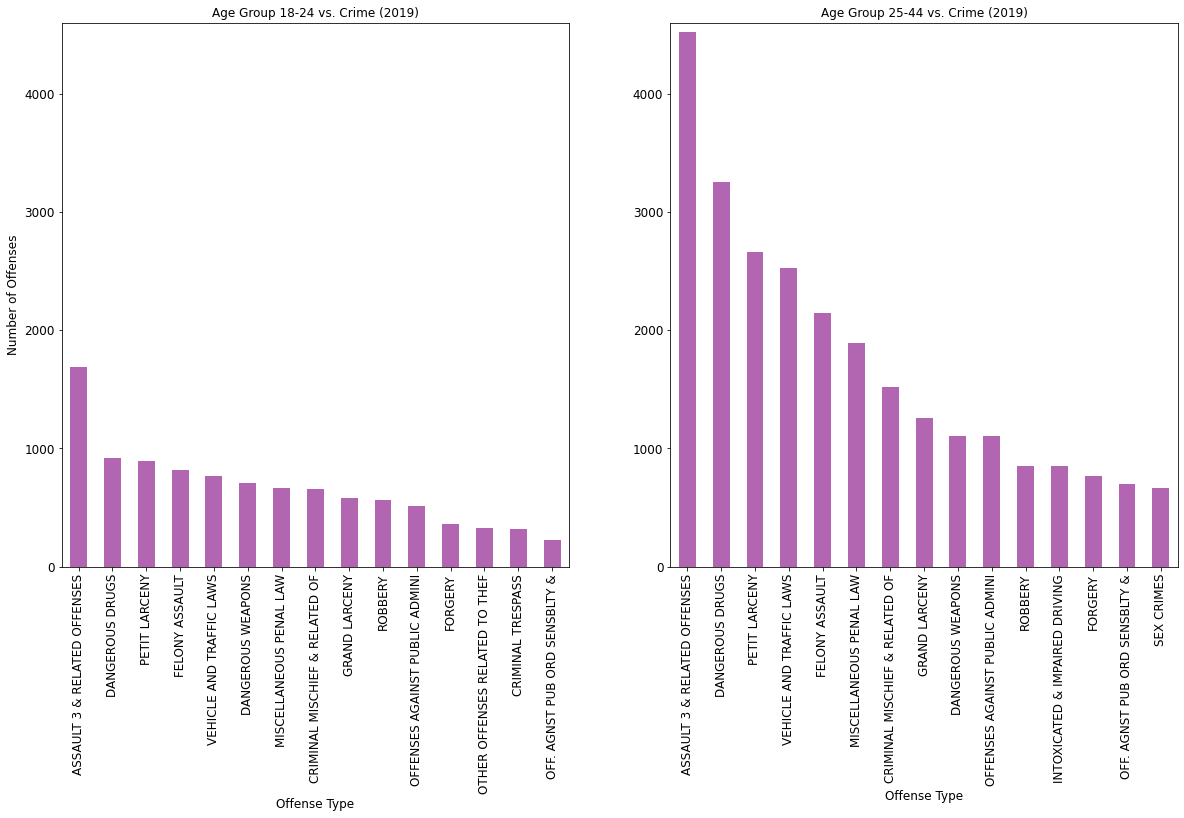

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

plt.subplot(1, 2, 1)

age_group_18.plot(kind="bar", color="purple", alpha=0.6, fontsize=12)

plt.title("Age Group 18-24 vs. Crime (2019)", fontsize=12)
plt.ylabel("Number of Offenses", fontsize=12)
plt.xlabel("Offense Type", fontsize=12)
plt.ylim(top=4600)

plt.subplot(1, 2, 2)
age_group_25.plot(kind="bar", color="purple", alpha=0.6, fontsize=12)
plt.title("Age Group 25-44 vs. Crime (2019)", fontsize=12)
plt.xlabel("Offense Type", fontsize=12)
plt.ylim(top=4600)
plt.savefig("AgeGroupsVsCrime2019.png", dpi=300, bbox_inches="tight") 

In [8]:
data_20 = nypd_data2020.loc[(nypd_data2020["ARREST_DATE"] > "03/01/2020") & (nypd_data2020["ARREST_DATE"] < "06/01/2020"), :]
data_20.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
1,210517846,2020-03-04,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)
5,213557081,2020-05-27,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601503,F,Q,103,0,18-24,M,WHITE HISPANIC,1036050,193947,40.698873,-73.813190,POINT (-73.81319021099995 40.698873097000046)
7,210784443,2020-03-10,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,17,0,25-44,M,WHITE HISPANIC,992254,214997,40.756798,-73.971111,POINT (-73.97111078699999 40.75679820100004)
11,213153714,2020-05-16,503.0,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201601,F,M,34,0,25-44,M,BLACK HISPANIC,1003133,249705,40.852046,-73.931745,POINT (-73.93174513099996 40.852045557000054)
12,210749767,2020-03-09,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL1220B01,M,Q,113,3,45-64,M,WHITE,1046315,187088,40.679981,-73.776234,POINT (-73.77623390699995 40.67998073800004)


In [9]:
younger_group_18_24 = data_20.loc[data_20["AGE_GROUP"] == "18-24"]

# use groupby
younger_age_group_18 = group_18_24.groupby(["OFNS_DESC"]).count()["ARREST_DATE"].sort_values(ascending=False).head(15)
younger_age_group_18

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      1690
DANGEROUS DRUGS                    917
PETIT LARCENY                      897
FELONY ASSAULT                     818
VEHICLE AND TRAFFIC LAWS           766
DANGEROUS WEAPONS                  703
MISCELLANEOUS PENAL LAW            663
CRIMINAL MISCHIEF & RELATED OF     660
GRAND LARCENY                      579
ROBBERY                            564
OFFENSES AGAINST PUBLIC ADMINI     510
FORGERY                            356
OTHER OFFENSES RELATED TO THEF     327
CRIMINAL TRESPASS                  317
OFF. AGNST PUB ORD SENSBLTY &      226
Name: ARREST_DATE, dtype: int64

In [10]:
older_group_25_44 = data_20.loc[data_20["AGE_GROUP"] == "25-44"]

# use groupby
older_age_group_25 = group_25_44.groupby(["OFNS_DESC"]).count()["ARREST_DATE"].sort_values(ascending=False).head(15)
older_age_group_25

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      4521
DANGEROUS DRUGS                   3257
PETIT LARCENY                     2664
VEHICLE AND TRAFFIC LAWS          2530
FELONY ASSAULT                    2143
MISCELLANEOUS PENAL LAW           1890
CRIMINAL MISCHIEF & RELATED OF    1522
GRAND LARCENY                     1254
DANGEROUS WEAPONS                 1102
OFFENSES AGAINST PUBLIC ADMINI    1101
ROBBERY                            850
INTOXICATED & IMPAIRED DRIVING     850
FORGERY                            765
OFF. AGNST PUB ORD SENSBLTY &      695
SEX CRIMES                         666
Name: ARREST_DATE, dtype: int64

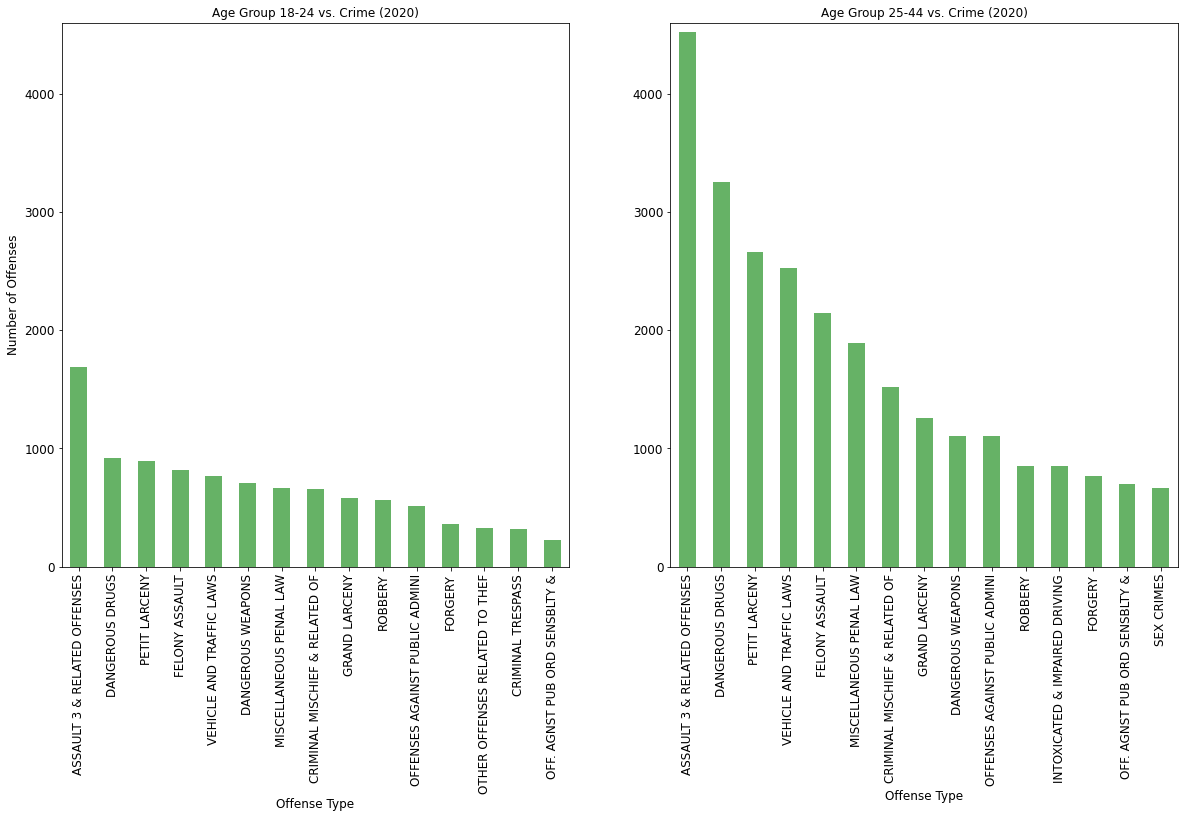

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

plt.subplot(1, 2, 1)

younger_age_group_18.plot(kind="bar", color="green", alpha=0.6, fontsize=12)

plt.title("Age Group 18-24 vs. Crime (2020)", fontsize=12)
plt.ylabel("Number of Offenses", fontsize=12)
plt.xlabel("Offense Type", fontsize=12)
plt.ylim(top=4600)

plt.subplot(1, 2, 2)
older_age_group_25.plot(kind="bar", color="green", alpha=0.6, fontsize=12)
plt.title("Age Group 25-44 vs. Crime (2020)", fontsize=12)
plt.xlabel("Offense Type", fontsize=12)
plt.ylim(top=4600)
plt.savefig("AgeGroupsVsCrime2020.png", dpi=300, bbox_inches="tight")